Bodyfat Data

In [1]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
import pandas as pd
import seaborn as sns
from scipy.io import arff
from sklearn.model_selection import train_test_split

In [2]:
data = arff.loadarff('bodyfat.arff')
df = pd.DataFrame(data[0])
print(df.shape)

df.head()

(252, 15)


,Density,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,class
0,0.665496,0.016949,0.146127,0.792746,0.253731,0.242531,0.200762,0.151515,0.294264,0.267081,0.189189,0.356436,0.460432,0.232143,0.258947
1,0.792801,0.000000,0.223789,0.886010,0.368159,0.251318,0.172808,0.218501,0.286783,0.267081,0.290541,0.282178,0.568345,0.428571,0.128421
2,0.407375,0.000000,0.145105,0.761658,0.144279,0.289982,0.235070,0.226475,0.309227,0.366460,0.331081,0.198020,0.302158,0.142857,0.532632
3,0.703248,0.067797,0.270795,0.886010,0.313433,0.395431,0.216010,0.258373,0.321696,0.267081,0.250000,0.376238,0.604317,0.428571,0.218947
4,0.342406,0.033898,0.268751,0.865285,0.164179,0.316344,0.388818,0.269537,0.399002,0.571429,0.331081,0.366337,0.482014,0.339286,0.604211


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Density,252.0,0.531816,0.167089,0.0,0.407375,0.525900,0.661984,1.0
Age,252.0,0.387880,0.213594,0.0,0.233051,0.355932,0.542373,1.0
Weight,252.0,0.246983,0.120127,0.0,0.165542,0.237073,0.320867,1.0
Height,252.0,0.842462,0.075914,0.0,0.803109,0.839378,0.886010,1.0
Neck,252.0,0.342889,0.120941,0.0,0.263682,0.343284,0.414179,1.0
Chest,252.0,0.378281,0.148163,0.0,0.264499,0.357645,0.458260,1.0
Abdomen,252.0,0.294231,0.137015,0.0,0.192821,0.273825,0.380241,1.0
Hip,252.0,0.237715,0.114259,0.0,0.167464,0.228070,0.295455,1.0
Thigh,252.0,0.304388,0.130922,0.0,0.219451,0.294264,0.377806,1.0
Knee,252.0,0.347235,0.149802,0.0,0.246894,0.341615,0.430124,1.0


In [4]:
print(df["class"])

0      0.258947
1      0.128421
2      0.532632
3      0.218947
4      0.604211
         ...   
247    0.231579
248    0.707368
249    0.616842
250    0.547368
251    0.671579
Name: class, Length: 252, dtype: float64


In [5]:
X = df.drop("class",axis=1)
X.head()
features = (X.shape)[1] # feature value
print(features) 

14


In [6]:
Y = df['class']
Y.head()

0    0.258947
1    0.128421
2    0.532632
3    0.218947
4    0.604211
Name: class, dtype: float64

In [7]:
# Train - Test ayrımını yapmak lazım.
X_train_full,X_test,y_train_full,y_test = train_test_split(X,Y,test_size = 0.2)

In [8]:
X_train,X_valid,y_train,y_valid = train_test_split(X_train_full,y_train_full,test_size = 0.2)   

In [9]:
# Model
# 1 Hidden katmanlı yapı

model = Sequential()
model.add(Dense(7, activation='relu')) # Hidden layer
model.add(Dense(1)) # Output layer


In [10]:
# Adam optimizer ile MAE performans kriteri ile
model.compile(tf.keras.optimizers.Adam(), loss='mean_squared_error', metrics=['accuracy'])

In [11]:
history = model.fit(X_train,y_train, epochs=30, batch_size=64,validation_data=(X_valid,y_valid))

Epoch 1/30
3/3 [==============================] - 1s 150ms/step - loss: 1.5681 - accuracy: 0.0000e+00 - val_loss: 1.2597 - val_accuracy: 0.0000e+00
Epoch 2/30
3/3 [==============================] - 0s 32ms/step - loss: 1.4131 - accuracy: 0.0000e+00 - val_loss: 1.1265 - val_accuracy: 0.0000e+00
Epoch 3/30
3/3 [==============================] - 0s 16ms/step - loss: 1.2690 - accuracy: 0.0000e+00 - val_loss: 1.0026 - val_accuracy: 0.0000e+00
Epoch 4/30
3/3 [==============================] - 0s 17ms/step - loss: 1.1353 - accuracy: 0.0000e+00 - val_loss: 0.8880 - val_accuracy: 0.0000e+00
Epoch 5/30
3/3 [==============================] - 0s 18ms/step - loss: 1.0113 - accuracy: 0.0000e+00 - val_loss: 0.7842 - val_accuracy: 0.0000e+00
Epoch 6/30
3/3 [==============================] - 0s 19ms/step - loss: 0.8993 - accuracy: 0.0000e+00 - val_loss: 0.6909 - val_accuracy: 0.0000e+00
Epoch 7/30
3/3 [==============================] - 0s 19ms/step - loss: 0.7975 - accuracy: 0.0000e+00 - val_loss: 0.60

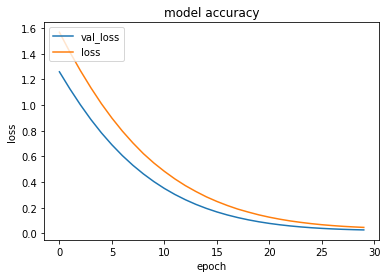

In [12]:
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])
plt.title('model accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['val_loss', 'loss'], loc='upper left')
plt.show()

In [13]:
testLoss = model.evaluate(X_test,y_test,verbose=0) 
print("Test loss : ",testLoss[0])
print("Test accuracy : ",testLoss[1])

Test loss :  0.03888159245252609
Test accuracy :  0.019607843831181526


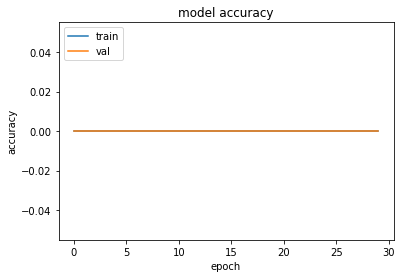

In [14]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [15]:
from scikeras.wrappers import KerasRegressor

In [16]:
keras_clf = KerasRegressor(model = model, optimizer="adam", epochs=30,batch_size=64,loss='mean_squared_error',verbose=0)

In [17]:
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor

In [18]:
bag_reg = BaggingRegressor(base_estimator=keras_clf,n_estimators=10,random_state=1)

In [19]:
baghist = bag_reg.fit(X_train,y_train)

INFO:tensorflow:Assets written to: C:\Users\enes_\AppData\Local\Temp\tmpdk3z506d\assets
INFO:tensorflow:Assets written to: C:\Users\enes_\AppData\Local\Temp\tmpl1lut7zi\assets
INFO:tensorflow:Assets written to: C:\Users\enes_\AppData\Local\Temp\tmpvtc9ci_s\assets
INFO:tensorflow:Assets written to: C:\Users\enes_\AppData\Local\Temp\tmpoi70x_km\assets
INFO:tensorflow:Assets written to: C:\Users\enes_\AppData\Local\Temp\tmpaymd00a7\assets
INFO:tensorflow:Assets written to: C:\Users\enes_\AppData\Local\Temp\tmprnpeg18z\assets
INFO:tensorflow:Assets written to: C:\Users\enes_\AppData\Local\Temp\tmp37mqnomq\assets
INFO:tensorflow:Assets written to: C:\Users\enes_\AppData\Local\Temp\tmpzesvtyks\assets
INFO:tensorflow:Assets written to: C:\Users\enes_\AppData\Local\Temp\tmplig7okhe\assets
INFO:tensorflow:Assets written to: C:\Users\enes_\AppData\Local\Temp\tmp0spu6b7z\assets


In [20]:
baghist.score(X_test,y_test)

0.03521102707465629

In [21]:
ada_reg = AdaBoostRegressor(base_estimator=keras_clf,n_estimators=10,random_state=1)

In [22]:
adahis = ada_reg.fit(X_train,y_train)

INFO:tensorflow:Assets written to: C:\Users\enes_\AppData\Local\Temp\tmp1pfx9clf\assets
INFO:tensorflow:Assets written to: C:\Users\enes_\AppData\Local\Temp\tmpkqx4yjpe\assets
INFO:tensorflow:Assets written to: C:\Users\enes_\AppData\Local\Temp\tmp7q7yzbka\assets
INFO:tensorflow:Assets written to: C:\Users\enes_\AppData\Local\Temp\tmp3vxi0r8i\assets
INFO:tensorflow:Assets written to: C:\Users\enes_\AppData\Local\Temp\tmpfimt30uh\assets
INFO:tensorflow:Assets written to: C:\Users\enes_\AppData\Local\Temp\tmpp4v0rsob\assets
INFO:tensorflow:Assets written to: C:\Users\enes_\AppData\Local\Temp\tmp16sogtly\assets
INFO:tensorflow:Assets written to: C:\Users\enes_\AppData\Local\Temp\tmpy6lexont\assets
INFO:tensorflow:Assets written to: C:\Users\enes_\AppData\Local\Temp\tmpqohsjucb\assets
INFO:tensorflow:Assets written to: C:\Users\enes_\AppData\Local\Temp\tmp754_uj13\assets


In [23]:
adahis.score(X_test,y_test)

0.04334876663631626

In [24]:
ranSub_reg = BaggingRegressor(base_estimator=keras_clf,n_estimators=10,bootstrap=False,bootstrap_features=True,random_state=1)

In [25]:
ransubhist = ranSub_reg.fit(X_train,y_train)

INFO:tensorflow:Assets written to: C:\Users\enes_\AppData\Local\Temp\tmp8388vo0l\assets
INFO:tensorflow:Assets written to: C:\Users\enes_\AppData\Local\Temp\tmpqyqmiek2\assets
INFO:tensorflow:Assets written to: C:\Users\enes_\AppData\Local\Temp\tmpca90n6es\assets
INFO:tensorflow:Assets written to: C:\Users\enes_\AppData\Local\Temp\tmphgg0txgu\assets
INFO:tensorflow:Assets written to: C:\Users\enes_\AppData\Local\Temp\tmpdxjz3e1s\assets
INFO:tensorflow:Assets written to: C:\Users\enes_\AppData\Local\Temp\tmpg6a_qitw\assets
INFO:tensorflow:Assets written to: C:\Users\enes_\AppData\Local\Temp\tmphp28axb9\assets
INFO:tensorflow:Assets written to: C:\Users\enes_\AppData\Local\Temp\tmpfb8psgjo\assets
INFO:tensorflow:Assets written to: C:\Users\enes_\AppData\Local\Temp\tmp6waistup\assets
INFO:tensorflow:Assets written to: C:\Users\enes_\AppData\Local\Temp\tmpx7kukqax\assets


In [26]:
ransubhist.score(X_test,y_test)

0.29576193581431354

In [18]:
from mlxtend.evaluate import paired_ttest_5x2cv

In [19]:
t1, p1 = paired_ttest_5x2cv(estimator1=bag_reg,
                              estimator2=ada_reg,
                              X=X, y=Y,
                              random_seed=1)
                            
if p1<0.05:
    print("We are rejecting null hypothesis.") # Two model different
else:
    print("We are accepting null hypothesis.") # Two model same

INFO:tensorflow:Assets written to: C:\Users\enes_\AppData\Local\Temp\tmpapwj0ny5\assets
INFO:tensorflow:Assets written to: C:\Users\enes_\AppData\Local\Temp\tmpk7vvai80\assets
INFO:tensorflow:Assets written to: C:\Users\enes_\AppData\Local\Temp\tmpwv0ipttx\assets
INFO:tensorflow:Assets written to: C:\Users\enes_\AppData\Local\Temp\tmpp0z1cs_g\assets
INFO:tensorflow:Assets written to: C:\Users\enes_\AppData\Local\Temp\tmpz5o_bcj9\assets
INFO:tensorflow:Assets written to: C:\Users\enes_\AppData\Local\Temp\tmpnpl_7md_\assets
INFO:tensorflow:Assets written to: C:\Users\enes_\AppData\Local\Temp\tmple0celz6\assets
INFO:tensorflow:Assets written to: C:\Users\enes_\AppData\Local\Temp\tmp7elfuju6\assets
INFO:tensorflow:Assets written to: C:\Users\enes_\AppData\Local\Temp\tmpft5pciv1\assets
INFO:tensorflow:Assets written to: C:\Users\enes_\AppData\Local\Temp\tmp_n4wbmnj\assets
INFO:tensorflow:Assets written to: C:\Users\enes_\AppData\Local\Temp\tmpzmuqw3ys\assets
INFO:tensorflow:Assets written t

In [20]:
t2, p2 = paired_ttest_5x2cv(estimator1=bag_reg,
                              estimator2=ranSub_reg,
                              X=X, y=Y,
                              random_seed=1)
                            
if p2<0.05:
    print("We are rejecting null hypothesis.") # Two model different
else:
    print("We are accepting null hypothesis.") # Two model same

INFO:tensorflow:Assets written to: C:\Users\enes_\AppData\Local\Temp\tmpq26_hpn1\assets
INFO:tensorflow:Assets written to: C:\Users\enes_\AppData\Local\Temp\tmpexwcoq0k\assets
INFO:tensorflow:Assets written to: C:\Users\enes_\AppData\Local\Temp\tmpsn5yot5c\assets
INFO:tensorflow:Assets written to: C:\Users\enes_\AppData\Local\Temp\tmp9xnm109r\assets
INFO:tensorflow:Assets written to: C:\Users\enes_\AppData\Local\Temp\tmpac0xmue0\assets
INFO:tensorflow:Assets written to: C:\Users\enes_\AppData\Local\Temp\tmpkiy647f1\assets
INFO:tensorflow:Assets written to: C:\Users\enes_\AppData\Local\Temp\tmp6hhmlr_o\assets
INFO:tensorflow:Assets written to: C:\Users\enes_\AppData\Local\Temp\tmpr6e0cxuh\assets
INFO:tensorflow:Assets written to: C:\Users\enes_\AppData\Local\Temp\tmpc9ntj0u1\assets
INFO:tensorflow:Assets written to: C:\Users\enes_\AppData\Local\Temp\tmpxcy65_oo\assets
INFO:tensorflow:Assets written to: C:\Users\enes_\AppData\Local\Temp\tmp36o70yxy\assets
INFO:tensorflow:Assets written t

In [21]:
t3, p3 = paired_ttest_5x2cv(estimator1=bag_reg,
                              estimator2=model,
                              X=X, y=Y,
                              random_seed=1)
                            
if p3<0.05:
    print("We are rejecting null hypothesis.") # Two model different
else:
    print("We are accepting null hypothesis.") # Two model same

INFO:tensorflow:Assets written to: C:\Users\enes_\AppData\Local\Temp\tmp1v776wjk\assets
INFO:tensorflow:Assets written to: C:\Users\enes_\AppData\Local\Temp\tmpuke8zi7z\assets
INFO:tensorflow:Assets written to: C:\Users\enes_\AppData\Local\Temp\tmpy4h2u2t4\assets
INFO:tensorflow:Assets written to: C:\Users\enes_\AppData\Local\Temp\tmpszkuyni3\assets
INFO:tensorflow:Assets written to: C:\Users\enes_\AppData\Local\Temp\tmprzxfq45k\assets
INFO:tensorflow:Assets written to: C:\Users\enes_\AppData\Local\Temp\tmpm9r9yx2_\assets
INFO:tensorflow:Assets written to: C:\Users\enes_\AppData\Local\Temp\tmpndzhen9i\assets
INFO:tensorflow:Assets written to: C:\Users\enes_\AppData\Local\Temp\tmps390ztqd\assets
INFO:tensorflow:Assets written to: C:\Users\enes_\AppData\Local\Temp\tmpcqp5s5t0\assets
INFO:tensorflow:Assets written to: C:\Users\enes_\AppData\Local\Temp\tmplhkrmwij\assets
4/4 [==============================] - 0s 0s/step
INFO:tensorflow:Assets written to: C:\Users\enes_\AppData\Local\Temp\t

In [22]:
t4, p4 = paired_ttest_5x2cv(estimator1=ada_reg,
                              estimator2=ranSub_reg,
                              X=X, y=Y,
                              random_seed=1)
                            
if p4<0.05:
    print("We are rejecting null hypothesis.") # Two model different
else:
    print("We are accepting null hypothesis.") # Two model same

INFO:tensorflow:Assets written to: C:\Users\enes_\AppData\Local\Temp\tmpbhtkmkmh\assets
INFO:tensorflow:Assets written to: C:\Users\enes_\AppData\Local\Temp\tmpqt320w2f\assets
INFO:tensorflow:Assets written to: C:\Users\enes_\AppData\Local\Temp\tmpk2nihq1m\assets
INFO:tensorflow:Assets written to: C:\Users\enes_\AppData\Local\Temp\tmpkjj69e20\assets
INFO:tensorflow:Assets written to: C:\Users\enes_\AppData\Local\Temp\tmp9d1_6hkt\assets
INFO:tensorflow:Assets written to: C:\Users\enes_\AppData\Local\Temp\tmpbwru_s2x\assets
INFO:tensorflow:Assets written to: C:\Users\enes_\AppData\Local\Temp\tmpuhqdk3_2\assets
INFO:tensorflow:Assets written to: C:\Users\enes_\AppData\Local\Temp\tmpm9juyrbc\assets
INFO:tensorflow:Assets written to: C:\Users\enes_\AppData\Local\Temp\tmpu051en_7\assets
INFO:tensorflow:Assets written to: C:\Users\enes_\AppData\Local\Temp\tmps0i3a5gd\assets
INFO:tensorflow:Assets written to: C:\Users\enes_\AppData\Local\Temp\tmp0h5a9q6y\assets
INFO:tensorflow:Assets written t

In [23]:
t5, p5 = paired_ttest_5x2cv(estimator1=ada_reg,
                              estimator2=model,
                              X=X, y=Y,
                              random_seed=1)
                            
if p5<0.05:
    print("We are rejecting null hypothesis.") # Two model different
else:
    print("We are accepting null hypothesis.") # Two model same

INFO:tensorflow:Assets written to: C:\Users\enes_\AppData\Local\Temp\tmpkpns1ph3\assets
INFO:tensorflow:Assets written to: C:\Users\enes_\AppData\Local\Temp\tmpe2vcyj7n\assets
INFO:tensorflow:Assets written to: C:\Users\enes_\AppData\Local\Temp\tmpfl64oh45\assets
INFO:tensorflow:Assets written to: C:\Users\enes_\AppData\Local\Temp\tmpm65k35f4\assets
INFO:tensorflow:Assets written to: C:\Users\enes_\AppData\Local\Temp\tmp4smu_ynq\assets
INFO:tensorflow:Assets written to: C:\Users\enes_\AppData\Local\Temp\tmp8t21nxoa\assets
INFO:tensorflow:Assets written to: C:\Users\enes_\AppData\Local\Temp\tmp_qhl89ur\assets
INFO:tensorflow:Assets written to: C:\Users\enes_\AppData\Local\Temp\tmp05es8p4f\assets
INFO:tensorflow:Assets written to: C:\Users\enes_\AppData\Local\Temp\tmppn6ei_y7\assets
4/4 [==============================] - 0s 7ms/step
INFO:tensorflow:Assets written to: C:\Users\enes_\AppData\Local\Temp\tmpo_1kd5au\assets
INFO:tensorflow:Assets written to: C:\Users\enes_\AppData\Local\Temp\

In [24]:
t6, p6 = paired_ttest_5x2cv(estimator1=ranSub_reg,
                              estimator2=model,
                              X=X, y=Y,
                              random_seed=1)
                            
if p6<0.05:
    print("We are rejecting null hypothesis.") # Two model different
else:
    print("We are accepting null hypothesis.") # Two model same

INFO:tensorflow:Assets written to: C:\Users\enes_\AppData\Local\Temp\tmpkfq168hd\assets
INFO:tensorflow:Assets written to: C:\Users\enes_\AppData\Local\Temp\tmpodvog_6f\assets
INFO:tensorflow:Assets written to: C:\Users\enes_\AppData\Local\Temp\tmpvkrwt5p6\assets
INFO:tensorflow:Assets written to: C:\Users\enes_\AppData\Local\Temp\tmpwjsnju3r\assets
INFO:tensorflow:Assets written to: C:\Users\enes_\AppData\Local\Temp\tmpaq15dmdn\assets
INFO:tensorflow:Assets written to: C:\Users\enes_\AppData\Local\Temp\tmpynr3o12j\assets
INFO:tensorflow:Assets written to: C:\Users\enes_\AppData\Local\Temp\tmpkj7euvih\assets
INFO:tensorflow:Assets written to: C:\Users\enes_\AppData\Local\Temp\tmp4qoku2ws\assets
INFO:tensorflow:Assets written to: C:\Users\enes_\AppData\Local\Temp\tmp3r8qp9qp\assets
INFO:tensorflow:Assets written to: C:\Users\enes_\AppData\Local\Temp\tmp85revch3\assets
4/4 [==============================] - 0s 5ms/step
INFO:tensorflow:Assets written to: C:\Users\enes_\AppData\Local\Temp\